In [179]:
from pandas import Series
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, f1_score, log_loss, average_precision_score
from sklearn.metrics import precision_score, accuracy_score, brier_score_loss, confusion_matrix
import pandas_profiling
from pandas_profiling import ProfileReport

In [6]:
#A function to show scores
def scores(y_test, y_pred, prob):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = roc_auc_score(y_test, prob)
    
    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()
    print ("f1_score:",round(f1_score(y_test,y_pred), 3))
    print ("accuracy_score:",round(accuracy_score(y_test,y_pred), 3))
    print ("precision_score:",round(precision_score(y_test,y_pred), 3))
    print ("recall_score:",round(recall_score(y_test,y_pred), 3))
    print ("log_loss:",round(log_loss(y_test,y_pred), 3))
    print ("roc_auc_score:",round(roc_auc, 3))
    print("average_precision_score:", round(average_precision_score(y_test,y_pred), 3))
    print("brier_score_loss:", round(brier_score_loss(y_test,y_pred), 3))
    print('Confusion matrix:\n{}' .format(confusion_matrix(y_test,y_pred)))

In [148]:
#Let's have a look at the data
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [149]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

There are missing values in "education' and some columns containing object type values.

In [150]:
#Let's prepare train data for naive model
train_naive = train.copy()
train_naive.dropna(inplace = True)
ord_enc = OrdinalEncoder()
train_naive.drop(['client_id','app_date'],axis=1,inplace=True)
obj_columns = train_naive.select_dtypes(include=['object']).columns
train_naive[obj_columns] = ord_enc.fit_transform(train_naive[obj_columns]).astype(int)
train_naive.head(5)

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,3,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,3,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,3,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,3,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,1,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0


In [151]:
#The naive model itself
model = LogisticRegression()
X = train_naive.drop(['default'], axis = 1).values
y = train_naive['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]


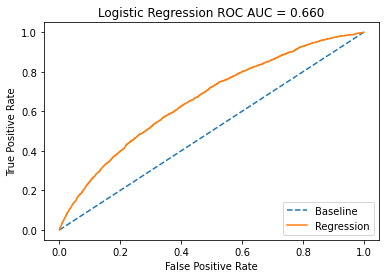

f1_score: 0.023
accuracy_score: 0.872
precision_score: 0.42
recall_score: 0.012
log_loss: 4.436
roc_auc_score: 0.66
average_precision_score: 0.131
brier_score_loss: 0.128
Confusion matrix:
[[19182    47]
 [ 2785    34]]


In [152]:
#And it's metrics
scores(y_test, y_pred, proba)

In [153]:
#It is time to unite datasets. The new feature "test" will be used later in order to divide them. 
#And the "default" feature will now be added to test dataset.
test['test'] = 1 
train['test'] = 0 
test['default'] = 0 
data = train.append(test, sort = False).reset_index(drop=True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [268]:
#Let's have a little more careful look
profile = ProfileReport(data, minimal=True)
profile

In [7]:
#Now I have to:
#1.Replace the missing values in "education" with the most frequent one.
#2.Convert "app_date" to a proper datetime format.
#3.Encode all the object columns.
#(These are "app_date","education","sex","car"."car_type","foreign_passport" )

<AxesSubplot:xlabel='education', ylabel='count'>

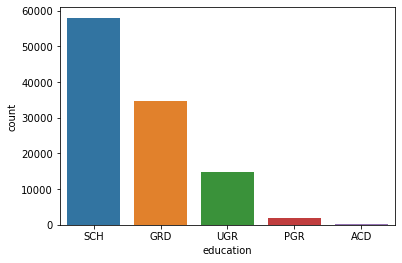

In [154]:
sns.countplot(data['education'])

In [155]:
#The most frequent value is "SCH". Let's get rid of the missing values.
data[data['education'].isnull()] = data[data['education'].isnull()].fillna('SCH')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         110148 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

In [156]:
#"app_date" now must be converted to a proper format and encoded.
data['app_date'] = data['app_date'].apply(lambda x: datetime.datetime.strptime(x,'%d%b%Y'))
data['app_date'] = data['app_date'].apply(lambda x: (data['app_date'].max() - x).days)
data.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,88,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0,0
1,63161,49,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0,0
2,25887,88,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0,0
3,16222,97,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0,0
4,101655,12,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0,0


In [157]:
#Now let's encode all the object columns  
ord_enc = OrdinalEncoder()
obj_columns = data.select_dtypes(include=['object']).columns
data[obj_columns] = ord_enc.fit_transform(data[obj_columns]).astype(int)
data.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,88,3,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0,0
1,63161,49,3,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0,0
2,25887,88,3,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0,0
3,16222,97,3,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0,0
4,101655,12,1,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0,0


<AxesSubplot:xlabel='age', ylabel='Density'>

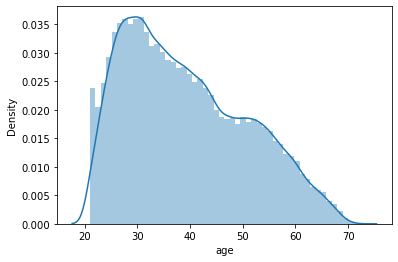

In [158]:
# Let's look at feature's distribution
plt.figure()
sns.distplot(data['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

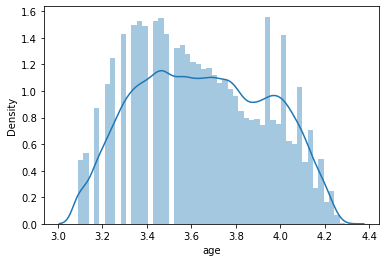

In [159]:
# Does not look good enough. let's log it.
plt.figure()
sns.distplot(data['age'].apply(lambda x: np.log(x+1)))

In [160]:
#Looks better. Let's keep it.
data['age'] = data['age'].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='score_bki', ylabel='Density'>

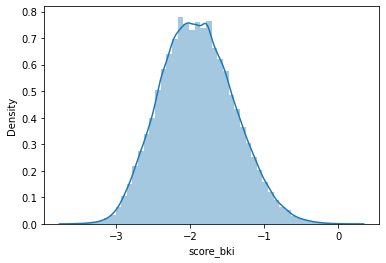

In [161]:
plt.figure()
sns.distplot(data['score_bki'])

In [162]:
#Good enough. So be it.

<AxesSubplot:xlabel='income', ylabel='Density'>

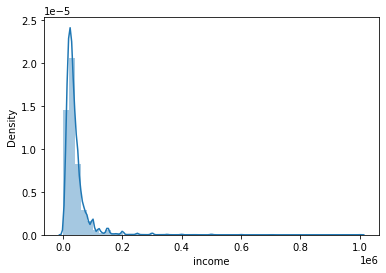

In [163]:
plt.figure()
sns.distplot(data['income'])

<AxesSubplot:xlabel='income', ylabel='Density'>

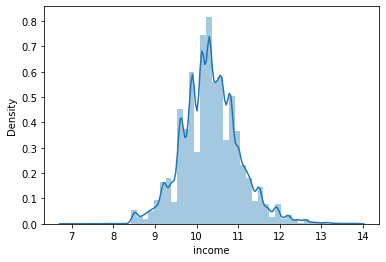

In [164]:
plt.figure()
sns.distplot(data['income'].apply(lambda x: np.log(x+1)))

In [165]:
#That's better
data['income'] = data['income'].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='decline_app_cnt', ylabel='Density'>

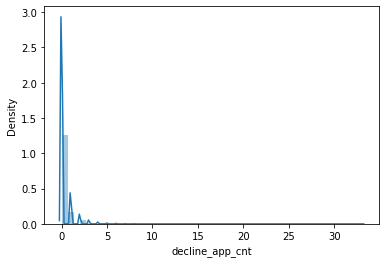

In [166]:
plt.figure()
sns.distplot(data['decline_app_cnt'])

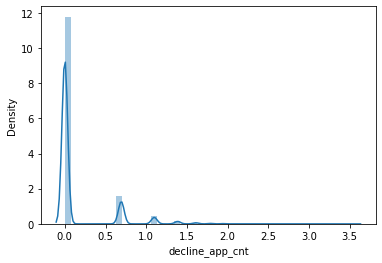

In [167]:
#All the same.
plt.figure()
sns.distplot(data['decline_app_cnt'].apply(lambda x: np.log(x+1)))
data['decline_app_cnt'] = data['decline_app_cnt'].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='bki_request_cnt', ylabel='Density'>

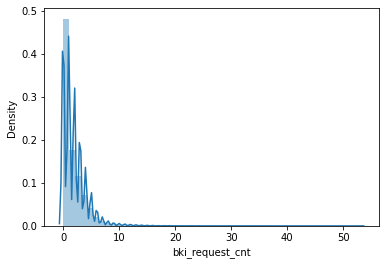

In [168]:
plt.figure()
sns.distplot(data['bki_request_cnt'])

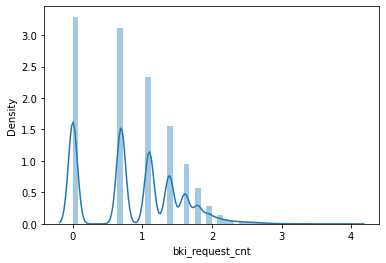

In [169]:
plt.figure()
sns.distplot(data['bki_request_cnt'].apply(lambda x: np.log(x+1)))
data['bki_request_cnt'] = data['bki_request_cnt'].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='app_date', ylabel='Density'>

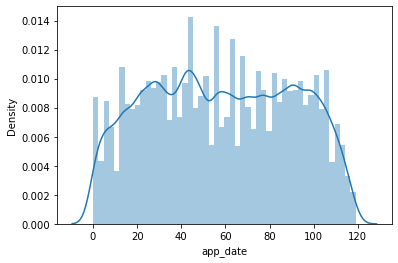

In [170]:
plt.figure()
sns.distplot(data['app_date'])

<AxesSubplot:>

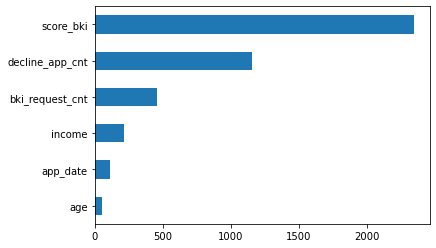

In [171]:
#Let's see the numerical feature's significance
num_cols = ['age','decline_app_cnt','score_bki','income','bki_request_cnt','app_date']
imp_num = pd.Series(f_classif(data[data['test'] == 0][num_cols], data[data['test'] == 0]['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<AxesSubplot:>

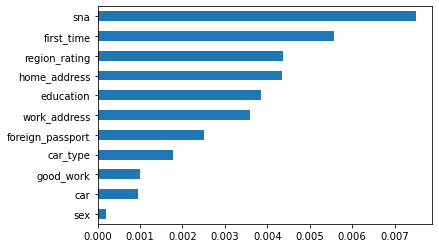

In [172]:
#And the cat/bin ones
cat_cols = ['education','sex','car','car_type','good_work','region_rating','home_address','work_address','sna','first_time',
'foreign_passport']
imp_cat = Series(mutual_info_classif(data[data['test'] == 0][cat_cols], data[data['test'] == 0]['default'],
                                     discrete_features =True), index = cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [173]:
#'age' and 'sex' seem to be of lowest significance. I'll try the model with an without them

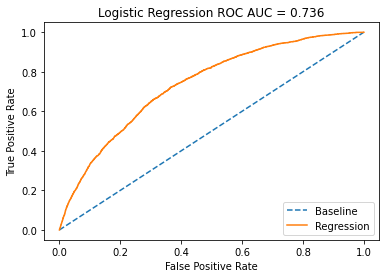

f1_score: 0.342
accuracy_score: 0.669
precision_score: 0.228
recall_score: 0.683
log_loss: 11.416
roc_auc_score: 0.736
average_precision_score: 0.195
brier_score_loss: 0.331
Confusion matrix:
[[12924  6436]
 [  882  1898]]


In [215]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
X = data[data['test']==0].drop(['default','test','client_id'], axis = 1).values
y = data[data['test']==0]['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]
scores(y_test, y_pred, proba)

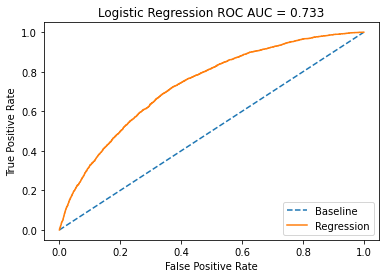

f1_score: 0.34
accuracy_score: 0.669
precision_score: 0.227
recall_score: 0.68
log_loss: 11.441
roc_auc_score: 0.733
average_precision_score: 0.194
brier_score_loss: 0.331
Confusion matrix:
[[12915  6445]
 [  889  1891]]


In [216]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
X = data[data['test']==0].drop(['default','age','sex','test','client_id'], axis = 1).values
y = data[data['test']==0]['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]
scores(y_test, y_pred, proba)

In [137]:
#Both look bad but the pont is they look almost the same. I'll get rid of the two freatures.
data.drop(['age','sex'], axis = 1, inplace = True)

In [138]:
data.head(5)


,client_id,app_date,education,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,test
0,25905,88,3,1,1,0.000000,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0,0
1,63161,49,3,0,0,0.000000,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0,0
2,25887,88,3,1,0,1.098612,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0,0
3,16222,97,3,0,0,0.000000,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0,0
4,101655,12,1,0,0,0.000000,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0,0


In [142]:
#Now I'll try making dummies of the cat columns
cat_cols = ['education','home_address','work_address','sna','first_time']
data_w_dummies = pd.get_dummies(data, columns=cat_cols)

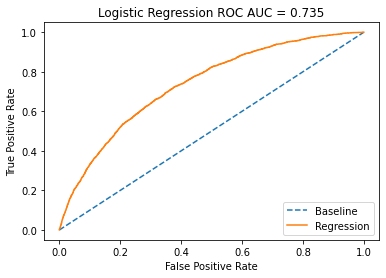

f1_score: 0.336
accuracy_score: 0.666
precision_score: 0.224
recall_score: 0.674
log_loss: 11.535
roc_auc_score: 0.735
average_precision_score: 0.192
brier_score_loss: 0.334
Confusion matrix:
[[12873  6487]
 [  907  1873]]


In [217]:
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
X = data_w_dummies[data_w_dummies['test']==0].drop(['default','test','client_id'], axis = 1).values
y = data_w_dummies[data_w_dummies['test']==0]['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]
scores(y_test, y_pred, proba)

In [177]:
#Strange, but it looks better without dummies.

In [218]:
#Trying hyperparameters
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


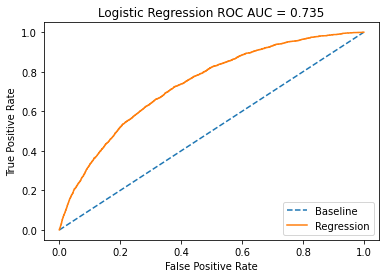

f1_score: 0.337
accuracy_score: 0.666
precision_score: 0.224
recall_score: 0.674
log_loss: 11.53
roc_auc_score: 0.735
average_precision_score: 0.192
brier_score_loss: 0.334
Confusion matrix:
[[12874  6486]
 [  905  1875]]


In [183]:
model = LogisticRegression(penalty='l1',C=1.0,solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced').fit(X_train, y_train)
X = data_w_dummies[data_w_dummies['test']==0].drop(['default','test','client_id'], axis = 1).values
y = data_w_dummies[data_w_dummies['test']==0]['default'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)[:, 1]
scores(y_test, y_pred, proba)


In [184]:
#Again it looks the same

In [240]:
data_train = data[data['test'] == 0].drop(['test'],axis=1)
data_test = data[data['test'] == 1].drop(['test'],axis=1)
X_train = data_train.drop(['default'], axis = 1)
y_train = data_train['default']
X_test = data_test.drop(['default'], axis=1)


In [241]:
#Submission
model = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]

In [254]:
submission = pd.DataFrame(data={'client_id':data_test['client_id'], 'default':y_pred})
submission.to_csv('submission.csv', index=False)
submission

,client_id,default
73799,74835,0.228015
73800,17527,0.797786
73801,75683,0.361905
73802,26883,0.403826
73803,28862,0.140699
